# Learning Objective:
Finding the DNA pattern that plays a role in the molecular clock.

#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

___

# Research Question:
**1-  Which DNA Pattern play the role of molecular clocks?** 


# Table of Content

- [1.1 Do We Have a "Clock" Gene?](#1-1-do-we-have-a-clock-gene)
- [1.2 Motif Finding is More Difficult Than You Think](#1-2-motif-finding-is-more-difficult-than-you-think)
- [1.3 Scoring Motifs](#1-3-scoring-motifs)
- [1.4 Greedy Motif Search](#1-4-greedy-motif-search)
- [1.5 Detour: Discovery of Codons and Split Genes](#1-5-detour-discovery-of-codons-and-split-genes)
- [1.6 Detour: DNA Arrays](#1-6-detour-dna-arrays)
- [1.7 Detour: Motif Scoring Functions](#1-7-detour-motif-scoring-functions)


___

##  1.1 Do We Have a "Clock" Gene?

**The circadian clock**

Animals, plants, and even bacteria have an internal clock called the circadian clock, which follows a 24-hour cycle. This clock controls daily patterns like sleep, and when it malfunctions, it can cause issues like delayed sleep-phase syndrome (DSPS).

But how do cells know the time? Is there a “clock gene”? And why do certain health problems, like heart attacks or asthma attacks, tend to happen at specific times of day?

Back in the 1970s, scientists found that mutations in a single gene could disrupt the circadian rhythm in flies. Later, similar genes were found in mammals. Today, we know of many such genes like clock, cycle, and timeless that help control daily rhythms and are shared across many species.

We’ll focus on plants, where the circadian clock is vital. Many plant activities like photosynthesis and flowering depend on sunlight. In fact, over a thousand plant genes are thought to be circadian. But what does it really mean for a gene to be “circadian”?

**Gene expression**

The Central Dogma of Molecular Biology says: DNA → RNA → Protein. First, DNA is transcribed into RNA, where thymine (T) is replaced by uracil (U). Then, RNA is translated into a protein, which carries out functions in the cell.

Translation works like this: the RNA is read in groups of three letters (called codons), and each codon is matched to one of 20 amino acids using the genetic code. Some codons give the same amino acid, and three special codons signal the end of the process.

For example, the DNA "TATACGAAA" becomes RNA "UAUACGAAA", which then becomes the amino acids "YTK".

Cells control how much RNA they make from each gene, called gene expression. This helps explain why different cells (like skin and brain cells) act differently even with the same DNA. Changes in gene expression over time also help the cell keep track of the day.

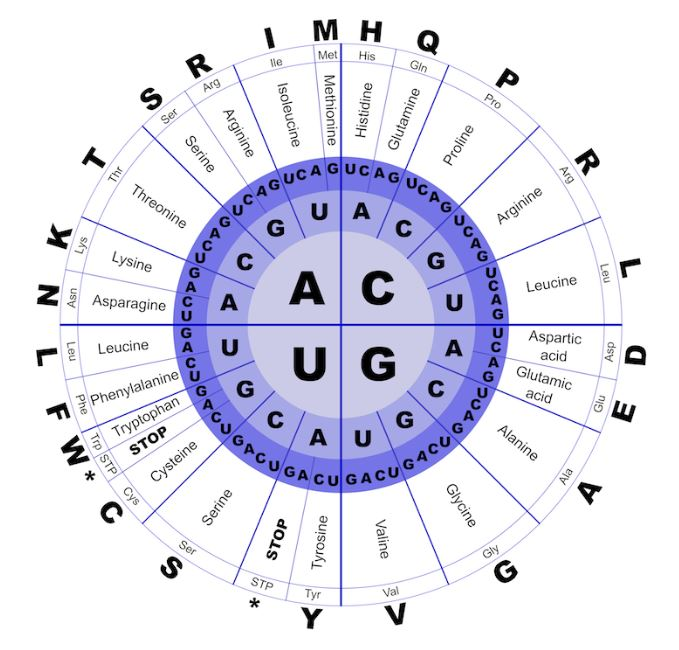

**Regulatory proteins**

Each plant cell has its own internal clock to track day and night. Three key genes — LHY, CCA1, and TOC1 — act as the clock’s main timekeepers. These genes make proteins that are influenced by things like sunlight or nutrients to adjust the plant’s daily rhythm.

Here’s how they work together:

- TOC1 turns on LHY and CCA1.

- LHY and CCA1 turn off TOC1.

This creates a loop:

- In the morning, sunlight turns on LHY and CCA1, which shut down TOC1.

- At night, LHY and CCA1 levels drop, so TOC1 increases again.

- Then TOC1 starts the cycle again by turning on LHY and CCA1.

This loop helps plants follow a daily rhythm.

The genes LHY, CCA1, and TOC1 produce transcription factors  special proteins that turn other genes on or off. They do this by binding to short DNA sequences called regulatory motifs, usually found just before the gene starts (in a region about 600–1000 nucleotides long).

For example, CCA1 often binds to the DNA sequence "AAAAAATCT", but it can also bind to similar sequences like "AAGAACTCT".

This variation makes things tricky. If all motifs were exactly the same, it would be easy. But since they can differ, we need smart algorithms to find these hidden patterns, even if we don’t know exactly what they look like. This is called motif finding.

___

##  1.2 Motif Finding is More Difficult Than You Think

**Identifying the evening element**

In 2000, Steve Kay used DNA arrays to find which genes in the plant Arabidopsis thaliana are active at different times of day. He studied the upstream("Upstream DNA" refers to the region before the start of a gene on the DNA strand.) DNA regions of about 500 circadian genes and found that the sequence "AAAATATCT" appeared 46 times  much more than expected.

Kay called this sequence the evening element. To test its role, he mutated it in one gene, and the gene stopped showing circadian behavior, proving it's a key regulatory motif.



<span style="background-color: orange; color: black;">**What is the possible downside of concatenating all the upstream regions into a single string and looking for frequent words in order to find a motif?**</span>

Because the genome has lots of random repeats, some words might appear often just by chance, not because they’re actually important for gene control.

So, you might waste time chasing false signals.

Some DNA motifs, like the evening element in plants, are very easy to find because they don’t change much  they’re highly conserved. But others, like the NF-κB binding site in flies, can vary a lot, making them harder to detect.

For example, when a fly is infected, it activates certain immunity genes. Many of these genes have similar 12-letter sequences (like "TCGGGGATTTCC") in their upstream regions. This sequence is a binding site for NF-κB, a protein that helps turn on immunity genes.

But unlike the evening element, NF-κB binding sites aren’t always identical. They have mutations and small differences, so we can’t find them just by exact matching  we need smarter ways to find slightly different patterns in the DNA.

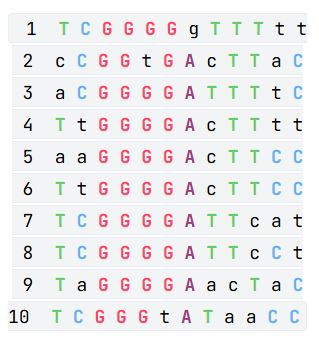

**Hide and seek with motifs**

my aim is to turn the biological challenge of finding regulatory motifs into a computational problem. Below, i have implanted a 15-mer hidden message at a randomly selected position in each of ten randomly generated DNA strings. This example mimics a transcription factor binding site hiding in the upstream regions of ten genes.

<p align="center"><code>"1 "atgaccgggatactgataaaaaaaagggggggggcgtacacattagataaacgtatgaagtacgttagactcggcgccgccg"<br>
 2 "acccctattttttgagcagatttagtgacctggaaaaaaaatttgagtacaaaacttttccgaataaaaaaaaaggggggga"<br>
 3 "tgagtatccctgggatgacttaaaaaaaagggggggtgctctcccgatttttgaatatgtaggatcattcgccagggtccga"<br>
 4 "gctgagaattggatgaaaaaaaagggggggtccacgcaatcgcgaaccaacgcggacccaaaggcaagaccgataaaggaga"<br>
 5 "tcccttttgcggtaatgtgccgggaggctggttacgtagggaagccctaacggacttaataaaaaaaagggggggcttatag"<br>
 6 "gtcaatcatgttcttgtgaatggatttaaaaaaaaggggggggaccgcttggcgcacccaaattcagtgtgggcgagcgcaa"<br>
 7 "cggttttggcccttgttagaggcccccgtaaaaaaaagggggggcaattatgagagagctaatctatcgcgtgcgtgttcat"<br>
 8 "aacttgagttaaaaaaaagggggggctggggcacatacaagaggagtcttccttatcagttaatgctgtatgacactatgta"<br>
  9 "ttggcccattggctaaaagcccaacttgacaaatggaagatagaatccttgcataaaaaaaagggggggaccgaaagggaag"<br>
10 "ctggtgagcaacgacagattcttacgtgcattagctcgcttccggggatctaatagcacgaagcttaaaaaaaaggggggga"<code></p>





<span style="background-color: orange; color: black;">**Can you find the implanted hidden message?**</span>

This problem is same as freqeunt word problem, finding the most frequent k-mer 

In [7]:
def find_hidden_motif(strings,k):
    """Finds the common k-mer (substring of length k) that appears in all DNA strings.
    Parameters:
    strings (list of str): A list of DNA sequences (strings of A, T, G, C).
    k (int): The length of the k-mer (motif) to search for.
    Returns:
    list: A list containing the common motif(s) of length k found in all DNA strings.
    If no common motif is found, returns an empty list.
    """
    
    # Get all k-mers from the first DNA string and store in a set
    common = set(strings[0][i:i+k] for i in range(len(strings[0]) - k +1))
    # For each remaining DNA string
    for s in strings[1:]:
        # Get all k-mers from current string
        kmers = set(s[i:i+k] for i in range(len(s) - k +1))
        # Keep only the k-mers that are common across all seen so far
        common = common & kmers
    # Return the list of common k-mers
    return list(common)
# List of DNA strings

dna_strings = [
"atgaccgggatactgataaaaaaaagggggggggcgtacacattagataaacgtatgaagtacgttagactcggcgccgccg", 
"acccctattttttgagcagatttagtgacctggaaaaaaaatttgagtacaaaacttttccgaataaaaaaaaaggggggga", 
"tgagtatccctgggatgacttaaaaaaaagggggggtgctctcccgatttttgaatatgtaggatcattcgccagggtccga", 
"gctgagaattggatgaaaaaaaagggggggtccacgcaatcgcgaaccaacgcggacccaaaggcaagaccgataaaggaga", 
"tcccttttgcggtaatgtgccgggaggctggttacgtagggaagccctaacggacttaataaaaaaaagggggggcttatag", 
"gtcaatcatgttcttgtgaatggatttaaaaaaaaggggggggaccgcttggcgcacccaaattcagtgtgggcgagcgcaa", 
"cggttttggcccttgttagaggcccccgtaaaaaaaagggggggcaattatgagagagctaatctatcgcgtgcgtgttcat", 
"aacttgagttaaaaaaaagggggggctggggcacatacaagaggagtcttccttatcagttaatgctgtatgacactatgta", 
"ttggcccattggctaaaagcccaacttgacaaatggaagatagaatccttgcataaaaaaaagggggggaccgaaagggaag", 
"ctggtgagcaacgacagattcttacgtgcattagctcgcttccggggatctaatagcacgaagcttaaaaaaaaggggggga" ]

find_hidden_motif(dna_strings, 15)

['aaaaaaaaggggggg']

Now imagine that instead of implanting exactly the same pattern into all strings, we mutate the pattern before inserting it into each string by randomly changing the nucleotides at four randomly selected positions within each implanted 15-mer, as shown below.

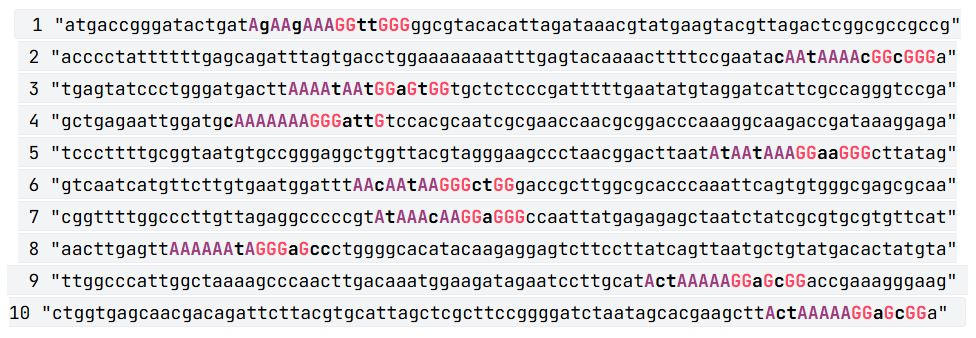

FrequentWords is no longer going to help us, since "AAAAAAAAGGGGGGG" does not even appear in the strings above. We could adapt the Frequent Words Problem into a “Frequent Words with Mismatches Problem”. However, concatenating all the strings into a single string is inadequate because it does not correctly model the biological problem of motif finding. A DnaA box is a pattern that clumps, or appears frequently, within a DNA string. In contrast, a regulatory motif is a pattern that appears at least once in each one of several different regions that are scattered throughout the genome. 

Furthermore, when Steve Kay used a DNA array to infer the set of circadian genes in plants, he did not expect that all genes in the resulting set would have the evening element (or its variants) in their upstream regions. Similarly, biologists do not expect that all genes with an elevated expression level in infected flies must be regulated by NF-κB. DNA array experiments are inherently noisy, and some genes identified by these experiments have nothing to do with the circadian clock in plants or immunity genes in flies.

___

##  1.3 Scoring Motifs

**From motifs to profile matrices and consensus strings**

To find hidden DNA motifs, we need a way to score how similar a set of k-mers (short DNA sequences) is. Since we don’t know the exact binding site (the “ideal” motif), we try to find a k-mer from each DNA string that looks most like the others.

We represent these selected k-mers as a motif matrix—a table with one k-mer per row. To score this matrix, we look at each column and find the most frequent nucleotide. This helps us see which positions are conserved (i.e., mostly the same across all k-mers).

For example, if column 2 always has a G, it's highly conserved. But if column 10 has a mix of different nucleotides, it’s less conserved. The more conserved a column, the more likely it’s part of a real motif.

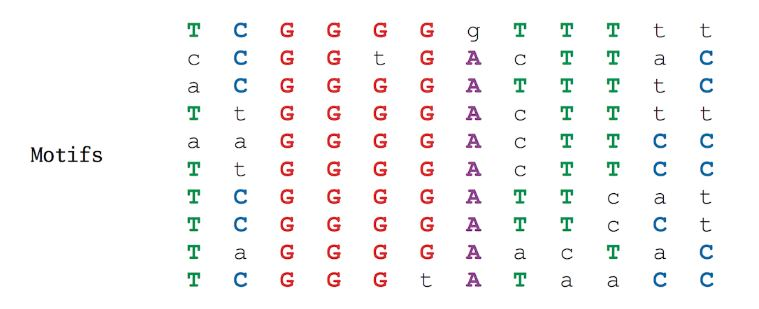

**Figure:** The NF-κB binding sites form a 10 x 12 motif matrix, with the most frequent nucleotide in each column shown in upper case letters and all other nucleotides shown in lower case letters.

In Python, we will represent a motif matrix as a list of strings Motifs. We can access the i-th string in the motif matrix by calling Motifs[i]; we can access the j-th symbol in this string by calling Motifs[i][j].

By varying the choice of k-mers in each string, we can construct a large number of different motif matrices from a given sample of DNA strings. Our goal is to select k-mers resulting in the most “conserved” motif matrix, meaning the matrix with the most upper case letters (and thus the fewest number of lower case letters). Leaving aside the question of how we select such k-mers, we will first focus on how to score the resulting motif matrices, defining Score(Motifs) as the number of unpopular (lower case) letters in the motif matrix Motifs (see updated figure below). Our goal is to find a collection of k-mers that minimizes this score

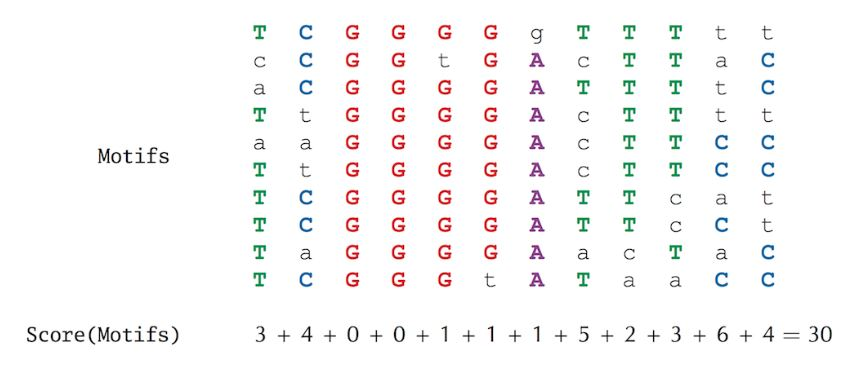

For a given choice of Motifs, we can construct a 4 x k count matrix, denoted Count(Motifs), counting the number of occurrences of each nucleotide in each column of the motif matrix; element (i, j) of Count(Motifs) stores the number of times that nucleotide i appears in column j of Motifs. (See updated figure below).

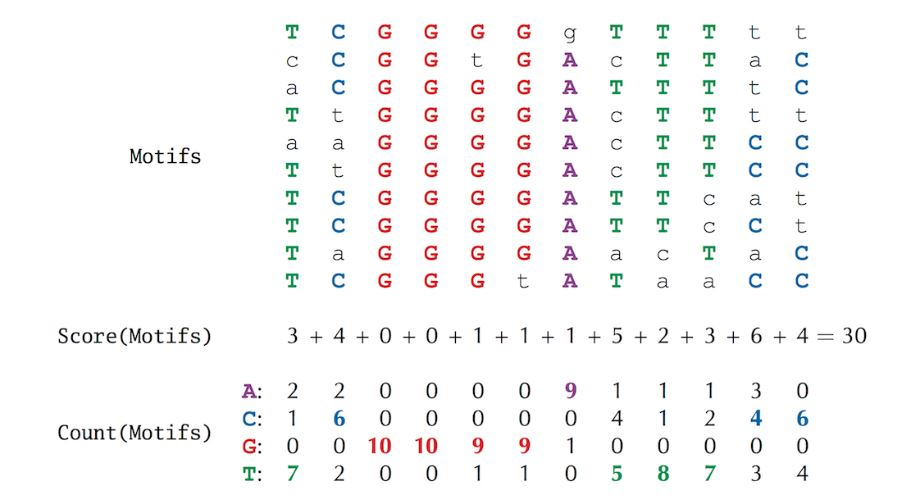

One way of representing a count matrix in Python is to create a list for each row of the matrix and then organize these lists into a larger dictionary (thus creating a dictionary whose keys are nucleotides and whose values are lists). For example, given the count matrix from the previous step:

In [13]:
count = {
    "A": [2, 2, 0, 0, 0, 0, 9, 1, 1, 1, 3, 0],
    "C": [1, 6, 0, 0, 0, 0, 0, 4, 1, 2, 4, 6],
    "G": [0, 0,10,10, 9, 9, 1, 0, 0, 0, 0, 0],
    "T": [7, 2, 0, 0, 1, 1, 0, 5, 8, 7, 3, 4]
}


For Count Motifs we need to first create Count function

In [15]:
def Count(Motifs):
    """ 
    input: Motifs
    output: dictionary of count of each symbol in Motifs
    """
    #initialize the empty list
    count = {}
    #We then range over all nucleotides symbol and create a list of zeroes corresponding to count[symbol]
    k = len(Motifs[0])
    #loop over the nucleotides
    for symbol in "ACGT":
        count[symbol] = []
        for j in range(k):
            count[symbol].append(0)
    t= len(Motifs)
    for i in range(t):
        for j in range(k):
            symbol = Motifs[i][j]
            count[symbol][j] += 1
    return count


#lets test the funtion
Motifs = ["GTACAACTGT",
    "CAACTATGAA",
    "TCCTACAGGA",
    "AAGCAAGGGT",
    "GCGTACGACC",
    "TCGTCAGCGT",
    "AACAAGGTCA",
    "CTCAGGCGTC",
    "GGATCCAGGT",
    "GGCAAGTACC"]

count = Count(Motifs)
count   

{'A': [2, 3, 3, 3, 6, 4, 2, 2, 1, 3],
 'C': [2, 3, 4, 3, 2, 3, 2, 1, 3, 3],
 'G': [4, 2, 3, 0, 1, 3, 4, 5, 5, 0],
 'T': [2, 2, 0, 4, 1, 0, 2, 2, 1, 4]}

As shown below, we will further divide all of the elements in the count matrix by t, the number of rows in Motifs. This results in a profile matrix Profile(Motifs) for which element (i, j) is the frequency of the i-th nucleotide in the j-th column of the motif matrix (i.e., the number of occurrences of the i-th nucleotide divided by t, the number of nucleotides in the column). Note that the elements of any column of the profile matrix sum to 1.

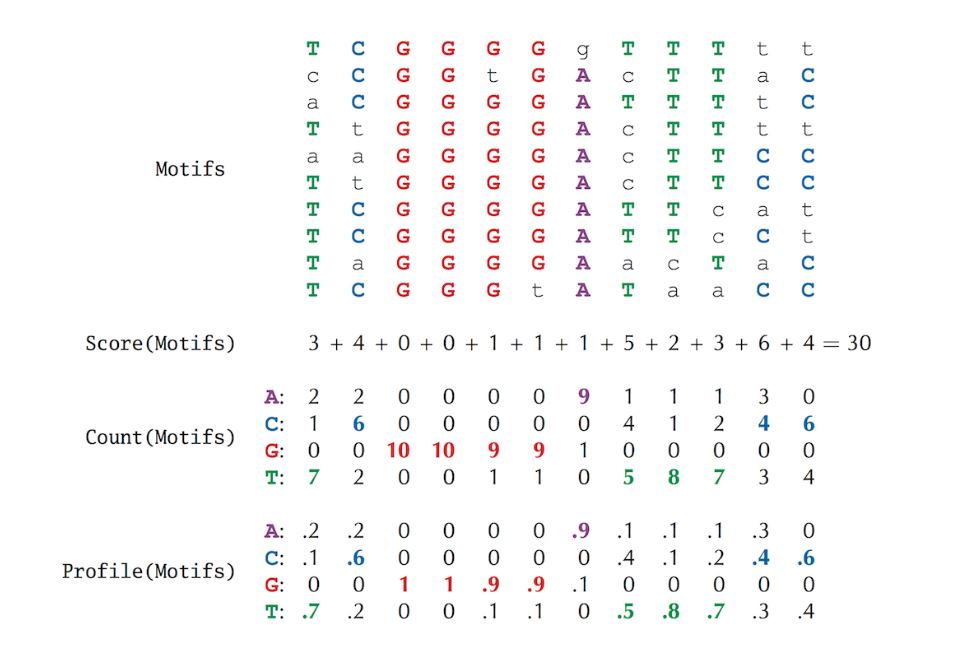

Now that we can generate Count(Motifs), in order to compute Profile(Motifs), we divide each element of the count matrix by the number of rows in the count matrix

In [17]:
def Profile(Motifs):
    """ 
    input: motifs
    output: dictionary of count of each symbol in Motifs with probability
    """
    profile = {}
    t = len(Motifs)
    count = Count(Motifs)
    for symbol in "ACGT":
        profile[symbol] = [val / t for val in count[symbol]] 
    return profile


#lets test this function
pr = Profile(Motifs)
pr

{'A': [0.2, 0.3, 0.3, 0.3, 0.6, 0.4, 0.2, 0.2, 0.1, 0.3],
 'C': [0.2, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.1, 0.3, 0.3],
 'G': [0.4, 0.2, 0.3, 0.0, 0.1, 0.3, 0.4, 0.5, 0.5, 0.0],
 'T': [0.2, 0.2, 0.0, 0.4, 0.1, 0.0, 0.2, 0.2, 0.1, 0.4]}

Now, we look column by column and pick the most common letter from each column. That gives us the consensus string.For example, as shown below, the consensus string for the NF-κB binding sites is "TCGGGGATTTCC"


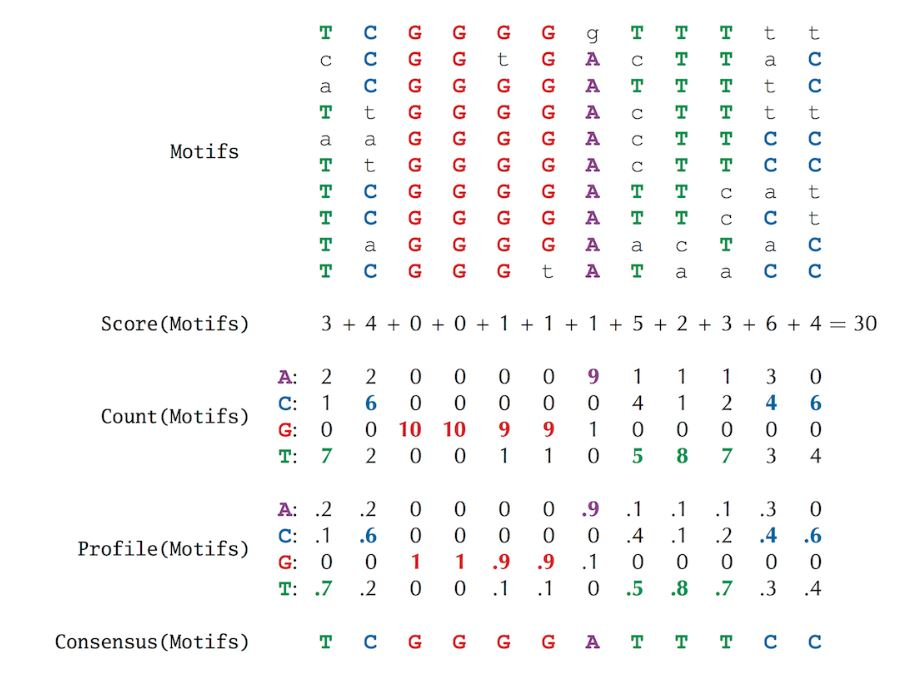

We can implement Consensus(Motifs) using Count(Motifs) as a subroutine. To do so, note that the j-th symbol of this consensus string is equal to the symbol corresponding to a maximum element in column j of Count(Motifs).

To implement this idea in Python, first set k equal to the length of Motifs[0] (as we did before) and count equal to the count matrix of Motifs.

In [18]:
def Consensus(Motifs):
    """ 
    input: Motifs
    output: consensus string( means most freqent nucleotide)
    """
    consensus = ""
    count = Count(Motifs)
    k = len(Motifs[0])
    for j in range(k):
        m = 0
        frequentSymbol = ""
        for symbol in "ACGT":
            if count[symbol][j] > m:
                m = count[symbol][j]
                frequentSymbol = symbol
        consensus += frequentSymbol
    return consensus

#lets test this function
Consensus(Motifs)

'GACTAAGGGT'

Finally, we can compute Score(Motifs) by first constructing Consensus(Motifs) and then summing the number of symbols in the j-th column of Motifs that do not match the symbol in position j of the consensus string.

In [ ]:
def Score(Motifs):
    """ 
    input: Motifs
    output: consensus string( means most freqent nucleotide)
    """
    consensus = Consensus(Motifs)
    k = len(consensus)
    t = len(Motifs)
    score = 0
    for j in range(k):
        for i in range(t):
            #is not equal
            if Motifs[i][j] != consensus[j]:
                score += 1
    return score

#lets test this function
Score(Motifs)

57

Biologists also commonly use a motif logo, a diagram for visualizing motif conservation that consists of a stack of letters at each position. The relative sizes of letters indicate their frequency in the column, i.e., highly conserved columns in the motif matrix correspond to tall symbols in the motif logo

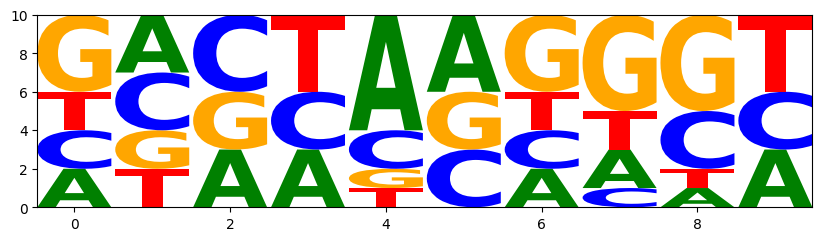

In [24]:
import logomaker
import pandas as pd

count = Count(Motifs)
df = pd.DataFrame(count)
logomaker.Logo(df)

**The Motif Finding Problem**

Now that we have a good grasp of scoring a collection of k-mers, we are ready to formulate a computational problem for motif finding. 

Motif Finding Problem: Given a collection of strings, find a set of k-mers, one from each string, that minimizes the score of the resulting motif.

**Input:** A collection of strings Dna and an integer k.

**Output:** A collection Motifs of k-mers, one from each string in Dna, minimizing Score(Motifs) among all possible choices of k-mers

Brute force search (also known as exhaustive search) is a general problem-solving technique that explores all possible candidate solutions and checks whether each candidate solves the problem. Such algorithms require little effort to design and are guaranteed to produce a correct solution, but they may take an enormous amount of time, and the number of candidates may be too large to check.

A brute force algorithm for the Motif Finding Problem, BruteForceMotifSearch(), considers every possible choice of k-mers Motifs from Dna (one k-mer from each string of n nucleotides) and returns the collection Motifs having minimum score.






<span style="background-color: orange; color: black;">**This method, being exhaustive, would probably require a lot of computational power and take a great amount of time, especially when progressing towards bigger genomes**</span>

**Analyzing the runtime of brute force motif finding**

We are hiding a special 15-letter DNA motif (with small changes) inside 10 long random DNA strings, each 600 letters long.
Our job? Find that hidden motif — even though it's mutated a bit.

What is BruteForceMotifSearch()?
It’s the slowest possible way to solve the problem:

- It checks every possible set of k-mers (short DNA words) — one from each string.

- For each such combination, it calculates a score to see how close those k-mers are.

But the number of combinations is huge!


**Why is it so slow?**
Let’s break down the math:

- From each DNA string, we can choose (600 - 15 + 1) = 586 different 15-mers.

- We do this for 10 strings, so total combinations =
586^10 ≈ 10²⁹ ways to choose motifs 😱

- Each scoring takes time too → Total steps =
(n - k + 1)^t × k × t

That’s so many steps that:

The sun will explode before the algorithm finishes.

**Real-life problem:**
- We don’t even know what k (motif length) is!

- So we have to try multiple k values.

- If the real motif is long, brute force becomes impossible.


**Conclusion :**
- Brute force is too slow for real biology data.

- We need a faster, smarter way to find motifs  that's what the rest of the notebook is about!


___

##  1.4 Greedy Motif Search

**Using the profile matrix to roll dice**

Many algorithms are iterative procedures that must choose among various alternatives at each iteration. Some of these alternatives may lead to correct solutions, whereas others may not. Greedy algorithms select the “most attractive” alternative at each iteration. For example, a greedy algorithm in chess might attempt to capture an opponent’s most valuable piece at every move. Yet anyone who has played chess knows that a strategy looking only one move ahead will likely produce disastrous results.

In general, most greedy algorithms typically fail to find an exact solution of the problem; instead, they are often fast heuristics that trade accuracy for speed in order to find an approximate solution. Nevertheless, for many biological problems, greedy algorithms will prove quite useful.

We want to find hidden DNA patterns (motifs) across different DNA strings. One way is to use a greedy approach, where we guess part of the motif and keep choosing the rest based on what seems most likely.

To help with this, we use something called a profile matrix. It shows how often each letter (A, C, G, T) appears at every position in a group of motifs. You can think of each column in this matrix as a special kind of dice with four sides: A, C, G, and T. But these dice aren’t fair — some sides are more likely than others.

For example, suppose in the first column the probabilities are A: 0.2, C: 0.1, G: 0.0, T: 0.7. If we want to randomly generate a motif, we can think of it as rolling this die to pick the first letter. We do the same for the next positions using the next columns of the matrix.

If we have a full motif like "ACGGGGATTACC", the probability that this motif comes from the profile matrix is calculated by multiplying the probabilities of each letter at each position. The more similar a motif is to the profile, the higher this probability will be.

This method helps us find motifs that are most likely to be real regulatory patterns, without checking every single possible combination.

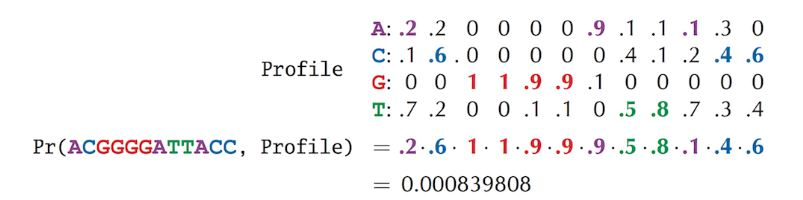

Compute Pr("TCGTGGATTTCC", Profile) for the NF-κB profile matrix shown below

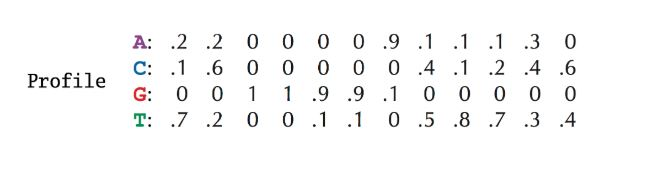

**No need to code anything here. Answer is 0 anyway**

anything that multiply with zero become zero


To implement a function Pr(Text, Profile), we begin by setting a “probability” variable p equal to 1. We then range through the characters of Text one at a time. At position i of Text, we set p equal to p times the value of Profile corresponding to symbol Text[i] and the i-th column, which is just Profile[Text[i]][i].

In [28]:
def Pr(Text, Profile):
    """ 
    input: Text and Profile
    output: probability
    """
    p = 1.0
    for i in range(len(Text)):
        symbol = Text[i]
        column = i
        p *= Profile[symbol][column]
    return p


#lets test this function
Motifs = ["GACTAAGGGT", "TCGTCAGCGT", "AACAAGGTCA", "CTCAGGCGTC", "GGATCCAGGT", "GGCAAGTACC"]
pr = Profile(Motifs)
Pr("GACTAAGGGT", pr)

0.0005787037037037037

If we already have a profile matrix, we can use it to find the most likely k-mer (short DNA pattern) in a longer DNA string.

For example, suppose we have a string like this:
"ggtACGGGGATTACCt"
We look at every piece (k-mer) of length 12 in it, and check which one fits the profile best  that is, which one has the highest probability according to the profile.

In this case, the best match is "ACGGGGATTACC" — it matches the profile well, so it’s called the profile most probable k-mer.

If two or more k-mers have the same highest score, we just pick the first one that appears.


Profile-most Probable k-mer Problem: Find a Profile-most probable k-mer in a string.

 **Input:** A string Text, an integer k, and a 4 x k matrix Profile.

 **Output:** A profile-most probable k-mer in Text according to Profile.

In [31]:
def ProfileMostProbKmer(Text, k, profile):
    """ 
    inputs: Three input Text(Dna String), k(the length of the k-mer), profile(the profile of the k-mer)
    output: most probable k-mer
    """
    max_prob = -1.0
    most_prob_kmer = ""
    for i in range(len(Text) - k + 1):
        kmer = Text[i:i+k]
        prob = Pr(kmer, profile)
        if prob > max_prob:
            max_prob = prob
            most_prob_kmer = kmer
    return most_prob_kmer


#lets test this function
Motifs = ["GACTAAGGGT", "TCGTCAGCGT", "AACAAGGTCA", "CTCAGGCGTC", "GGATCCAGGT", "GGCAAGTACC"]
pr = Profile(Motifs)
ProfileMostProbKmer("GACTAAGGGT", 3, pr)

'GAC'

Our proposed greedy motif search algorithm, GreedyMotifSearch(), starts by setting BestMotifs equal to the first k-mer from each string in Dna. These strings will serve as the best-scoring motifs found thus far.


In [35]:
def GreedyMotifSearch(Dna, k, t):
    """ 
    input: Dna(dna string), k(len of kmer), t(t is the number of kmers in Dna)
    output: best motifs
    """
    n = len(Dna[0])
    best_motifs = [Dna[i][0:k] for i in range(t)]
    for i in range(n - k + 1):
        motifs = [Dna[0][i:i + k]]
        for j in range(1, t):
            profile = Profile(motifs[0:j])
            motifs.append(ProfileMostProbKmer(Dna[j], k, profile))
        if Score(motifs) < Score(best_motifs):
            best_motifs = motifs
    return best_motifs


Dna = ["GGCGTTCAGGCA",
"AAGAATCAGTCA",
"CAAGGAGTTCGC",
"CACGTCAATCAC",
"CAATAATATTCG"]
k= 3
t = 5
best_motifs = GreedyMotifSearch(Dna, k, t)
print(best_motifs)

['CAG', 'CAG', 'CAA', 'CAA', 'CAA']


**Motifs in tuberculosis**

Tuberculosis (TB) is a disease caused by the Mycobacterium tuberculosis (MTB) bacterium, killing over a million people every year. Though antibiotics have helped control it, drug-resistant strains are now appearing.

MTB is dangerous because it can stay hidden (latent) in the body for years without causing illness. Around one-third of people worldwide have this latent form. These silent infections make TB hard to eliminate. Scientists want to understand what keeps MTB dormant and what reactivates it.

It's still unclear how MTB survives for so long during latency. Its resistance to antibiotics suggests it shuts down most of its genes — similar to how animals hibernate. In bacteria, this is called sporulation, where they go dormant to survive tough conditions.

Low oxygen levels (hypoxia) seem linked to latency. MTB becomes dormant in such conditions, likely waiting for the host to recover and spread the infection later. To understand this better, scientists are looking for a master regulator — a gene that detects low oxygen and activates other genes that help MTB survive in this dormant state.

In 2003, biologists found the dormancy survival regulator (DosR), a transcription factor that regulates many genes whose expression dramatically changes under hypoxic conditions. However, it remained unclear how DosR regulates these genes, and its transcription factor binding site remained unknown. In an attempt to resolve this puzzle, biologists performed a DNA array experiment and found 25 genes whose expression levels significantly changed in hypoxic conditions. Given the upstream regions of these genes, each of which is 250 nucleotides long, we would like to discover the “hidden message” that DosR uses to control the expression of these genes.

To simplify the problem a bit, we have selected just 10 of the 25 genes, resulting in the DosR dataset. Here, we will try to identify motifs in this dataset using the motif finding algorithms that we will develop. 

In [37]:
Dna = ["GCGCCCCGCCCGGACAGCCATGCGCTAACCCTGGCTTCGATGGCGCCGGCTCAGTTAGGGCCGGAAGTCCCCAATGTGGCAGACCTTTCGCCCCTGGCGGACGAATGACCCCAGTGGCCGGGACTTCAGGCCCTATCGGAGGGCTCCGGCGCGGTGGTCGGATTTGTCTGTGGAGGTTACACCCCAATCGCAAGGATGCATTATGACCAGCGAGCTGAGCCTGGTCGCCACTGGAAAGGGGAGCAACATC", "CCGATCGGCATCACTATCGGTCCTGCGGCCGCCCATAGCGCTATATCCGGCTGGTGAAATCAATTGACAACCTTCGACTTTGAGGTGGCCTACGGCGAGGACAAGCCAGGCAAGCCAGCTGCCTCAACGCGCGCCAGTACGGGTCCATCGACCCGCGGCCCACGGGTCAAACGACCCTAGTGTTCGCTACGACGTGGTCGTACCTTCGGCAGCAGATCAGCAATAGCACCCCGACTCGAGGAGGATCCCG", "ACCGTCGATGTGCCCGGTCGCGCCGCGTCCACCTCGGTCATCGACCCCACGATGAGGACGCCATCGGCCGCGACCAAGCCCCGTGAAACTCTGACGGCGTGCTGGCCGGGCTGCGGCACCTGATCACCTTAGGGCACTTGGGCCACCACAACGGGCCGCCGGTCTCGACAGTGGCCACCACCACACAGGTGACTTCCGGCGGGACGTAAGTCCCTAACGCGTCGTTCCGCACGCGGTTAGCTTTGCTGCC", "GGGTCAGGTATATTTATCGCACACTTGGGCACATGACACACAAGCGCCAGAATCCCGGACCGAACCGAGCACCGTGGGTGGGCAGCCTCCATACAGCGATGACCTGATCGATCATCGGCCAGGGCGCCGGGCTTCCAACCGTGGCCGTCTCAGTACCCAGCCTCATTGACCCTTCGACGCATCCACTGCGCGTAAGTCGGCTCAACCCTTTCAAACCGCTGGATTACCGACCGCAGAAAGGGGGCAGGAC", "GTAGGTCAAACCGGGTGTACATACCCGCTCAATCGCCCAGCACTTCGGGCAGATCACCGGGTTTCCCCGGTATCACCAATACTGCCACCAAACACAGCAGGCGGGAAGGGGCGAAAGTCCCTTATCCGACAATAAAACTTCGCTTGTTCGACGCCCGGTTCACCCGATATGCACGGCGCCCAGCCATTCGTGACCGACGTCCCCAGCCCCAAGGCCGAACGACCCTAGGAGCCACGAGCAATTCACAGCG", "CCGCTGGCGACGCTGTTCGCCGGCAGCGTGCGTGACGACTTCGAGCTGCCCGACTACACCTGGTGACCACCGCCGACGGGCACCTCTCCGCCAGGTAGGCACGGTTTGTCGCCGGCAATGTGACCTTTGGGCGCGGTCTTGAGGACCTTCGGCCCCACCCACGAGGCCGCCGCCGGCCGATCGTATGACGTGCAATGTACGCCATAGGGTGCGTGTTACGGCGATTACCTGAAGGCGGCGGTGGTCCGGA", "GGCCAACTGCACCGCGCTCTTGATGACATCGGTGGTCACCATGGTGTCCGGCATGATCAACCTCCGCTGTTCGATATCACCCCGATCTTTCTGAACGGCGGTTGGCAGACAACAGGGTCAATGGTCCCCAAGTGGATCACCGACGGGCGCGGACAAATGGCCCGCGCTTCGGGGACTTCTGTCCCTAGCCCTGGCCACGATGGGCTGGTCGGATCAAAGGCATCCGTTTCCATCGATTAGGAGGCATCAA", "GTACATGTCCAGAGCGAGCCTCAGCTTCTGCGCAGCGACGGAAACTGCCACACTCAAAGCCTACTGGGCGCACGTGTGGCAACGAGTCGATCCACACGAAATGCCGCCGTTGGGCCGCGGACTAGCCGAATTTTCCGGGTGGTGACACAGCCCACATTTGGCATGGGACTTTCGGCCCTGTCCGCGTCCGTGTCGGCCAGACAAGCTTTGGGCATTGGCCACAATCGGGCCACAATCGAAAGCCGAGCAG", "GGCAGCTGTCGGCAACTGTAAGCCATTTCTGGGACTTTGCTGTGAAAAGCTGGGCGATGGTTGTGGACCTGGACGAGCCACCCGTGCGATAGGTGAGATTCATTCTCGCCCTGACGGGTTGCGTCTGTCATCGGTCGATAAGGACTAACGGCCCTCAGGTGGGGACCAACGCCCCTGGGAGATAGCGGTCCCCGCCAGTAACGTACCGCTGAACCGACGGGATGTATCCGCCCCAGCGAAGGAGACGGCG", "TCAGCACCATGACCGCCTGGCCACCAATCGCCCGTAACAAGCGGGACGTCCGCGACGACGCGTGCGCTAGCGCCGTGGCGGTGACAACGACCAGATATGGTCCGAGCACGCGGGCGAACCTCGTGTTCTGGCCTCGGCCAGTTGTGTAGAGCTCATCGCTGTCATCGAGCGATATCCGACCACTGATCCAAGTCGGGGGCTCTGGGGACCGAAGTCCCCGGGCTCGGAGCTATCGGACCTCACGATCACC"]
t = len(Dna)
k = 15
best_motifs = GreedyMotifSearch(Dna, k, t)
print(best_motifs)
print(len(best_motifs))


['GTTAGGGCCGGAAGT', 'CCGATCGGCATCACT', 'ACCGTCGATGTGCCC', 'GGGTCAGGTATATTT', 'GTGACCGACGTCCCC', 'CTGTTCGCCGGCAGC', 'CTGTTCGATATCACC', 'GTACATGTCCAGAGC', 'GCGATAGGTGAGATT', 'CTCATCGCTGTCATC']
10


**Analyzing greedy motif finding**

GreedyMotifSearch() is fast and can be run with k = 15 to find candidate motifs in the DosR dataset, as we saw on the previous step.  At the same time, it trades accuracy for speed; when we run it on the Subtle Motif Dataset, GreedyMotifSearch() returns the 15-mer "gtAAAtAgaGatGtG" (total score: 58), which varies greatly from the true implanted motif "AAAAAAAAGGGGGGG".  This makes us highly suspicious of the results we obtained when running this algorithm on the DosR dataset.








<span style="background-color: orange; color: black;">**Why does GreedyMotifSearch() perform so poorly?**</span>

the GreedyMotifSearch() algorithm performs poorly because it lacks the ability to explore different alternatives beyond the immediate "best" choice, making it prone to settling on suboptimal solutions in cases where the motif is subtle or complex. More sophisticated algorithms like Gibbs Sampling or Exhaustive Search might perform better in this scenario by avoiding the pitfalls of local optima and exploring the motif space more thoroughly

At first glance, GreedyMotifSearch() may seem like a reasonable algorithm, but it is not! Let’s see whether GreedyMotifSearch() will find the (4, 1)-motif "ACGT" implanted in the following strings Dna:

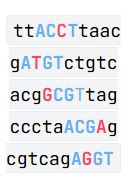

We will assume that the algorithm has already correctly chosen the implanted 4-mer "ACCT" from the first string in Dna and constructed the corresponding Profile:

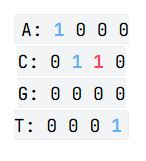


The algorithm is now ready to search for a profile-most probable 4-mer in the second string. The issue, however, is that there are so many zeroes in the profile matrix that the probability of every 4-mer but "ACCT" is zero! Thus, unless "ACCT" is present in every string in Dna, there is little chance that GreedyMotifSearch() will find the implanted motif. Zeroes in the profile matrix are not just a minor annoyance but rather a persistent problem that we must address.



___

##  1.5 Detour: Discovery of Codons and Split Genes

In 1961, scientists Sydney Brenner and Francis Crick discovered something important about how genes make proteins.

They found that:

- If 1 or 2 letters (nucleotides) are removed from a gene, the protein becomes completely messed up.

- But if 3 letters are removed, the rest of the protein still makes some sense.

To understand this, think of a sentence made of 3-letter words (like codons in a gene):

**THE SLY FOX AND THE SHY DOG**

If you remove 1 letter, everything shifts and becomes nonsense:

**THES LYF OXA NDT HES HYD OG**

Same with removing 2 letters:

**THES FOX AND THE SHY DOG** → gibberish again.

But if you remove 3 letters (like one word), the rest still makes sense:

**THE FOX AND THE SHY DOG**

This showed that genes are read in sets of three letters (codons). So, deleting 3 keeps the reading frame okay, but 1 or 2 breaks everything.

In 1964, Charles Yanofsky showed that genes and the proteins they make are lined up — the first part of a gene makes the first part of a protein, the second part makes the second, and so on.

For years, scientists thought genes were just long continuous stretches of code (like one long sentence).

But in 1977, Phillip Sharp and Richard Roberts discovered that genes are actually broken into pieces.

Here’s what happened:

- Sharp was studying a virus gene.

- He expected the RNA to match the DNA in one smooth strand.

- But when he looked under a microscope, he saw loops — meaning the RNA didn’t match the DNA in those spots.

This showed that genes are made from separate pieces called exons (the useful parts), and the loops (unmatched parts) were introns (junk or non-coding parts in between).

It’s like reading a magazine article where the story is on pages 12, 17, 40, and 95, with lots of ads (introns) in between.

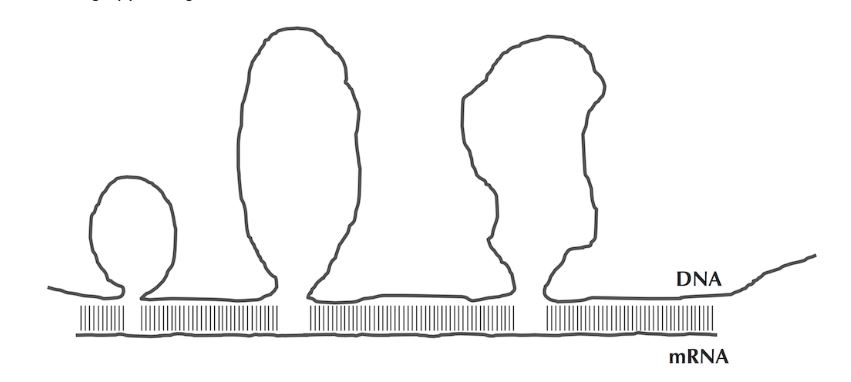

After discovering split genes, scientists had a big question: What happens to the introns (the useless parts)?

When a gene is copied, the first version is called pre-mRNA, and it includes both introns and exons.

But for making proteins, the cell needs only the exons. So, something must cut out the introns and join the exons together. This process is called splicing, and it's done by a machine in the cell called the spliceosome.

This discovery opened up lots of new research questions. Scientists are still trying to figure out what introns actually do. Some seem useless ("junk"), while others may help control how genes work.

Also, the same gene can look different in different species. For example, a gene in a chicken might have a different number of exons than the same gene in a human.

___

## 1.6 Detour: DNA Arrays

A DNA array is a chip with many tiny spots, and each spot has a special DNA piece (called a probe) stuck to it. Each probe matches a specific gene.

When you add a fluorescent sample (which lights up), the parts of the sample that match the probes will stick to them. The brighter the light at a spot, the more of that gene is active.

This lets scientists measure thousands of genes at once. For example, one experiment checked the activity of 8,000 genes in a single test.


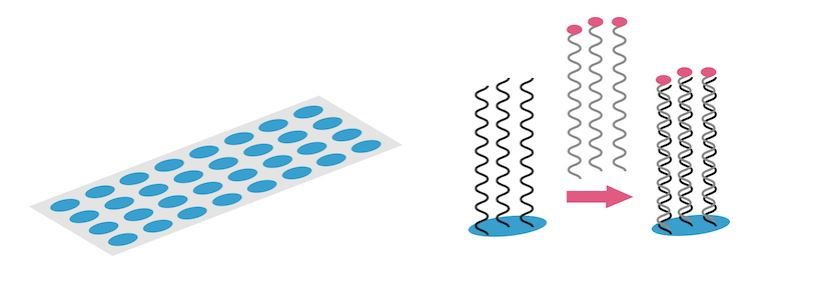

**What is a DNA Array Experiment?**

Imagine you want to know which genes are turned on in a plant, animal, or human cell. A DNA array (also called a microarray) is a tool that helps scientists measure the activity level of many genes at once.

**How Does It Work? Step-by-Step:**

**1-The Chip:**

A small glass or silicon chip is prepared. On this chip, scientists place thousands of short DNA sequences, each one matching a specific gene. These are called probes. Each probe sticks to a different gene’s messenger RNA (mRNA), which shows gene activity.

**2-The Sample:**

Scientists take mRNA from a real biological sample — like a plant leaf, a human cell, etc. They label this mRNA with a fluorescent dye so it will glow under special light.

**3-Hybridization:**

The labeled mRNA is poured over the chip. If the mRNA "finds" a matching probe on the chip, it will bind to it (because the sequences are complementary).

**4-Scan the Chip:**

The chip is scanned by a machine. Wherever the mRNA has stuck to a probe, it glows. The brighter the glow, the more mRNA was present, meaning the gene is more active.


**Example in Arabidopsis (a plant):**

In the example you read, scientists used a DNA array to measure the activity of 8,000 genes in a plant. This helped them discover which genes are turned on at night, revealing a special DNA pattern called the evening element, which plays a role in how the plant controls time (like its internal clock).

**In Simple Words:**

- A DNA array lets you see which genes are on or off.

- It's like checking the volume levels of thousands of songs (genes) all at once.

- The brighter the spot, the louder (more active) the gene is.

___

##  1.7 Detour: Motif Scoring Functions

Consider the second column (containing six occurrences of C, two occurrences of A, and two occurrences of T) and the final column (containing six occurrences of C and four occurrences of T) in the motif matrix from the figure below. Both of these columns contribute 4 to Score(Motifs).


<span style="background-color: orange; color: black;">**Does scoring these two columns equally make sense biologically?**</span>

No; Some columns may be more important/conserved than others, and some may be a part of the exon versus intron

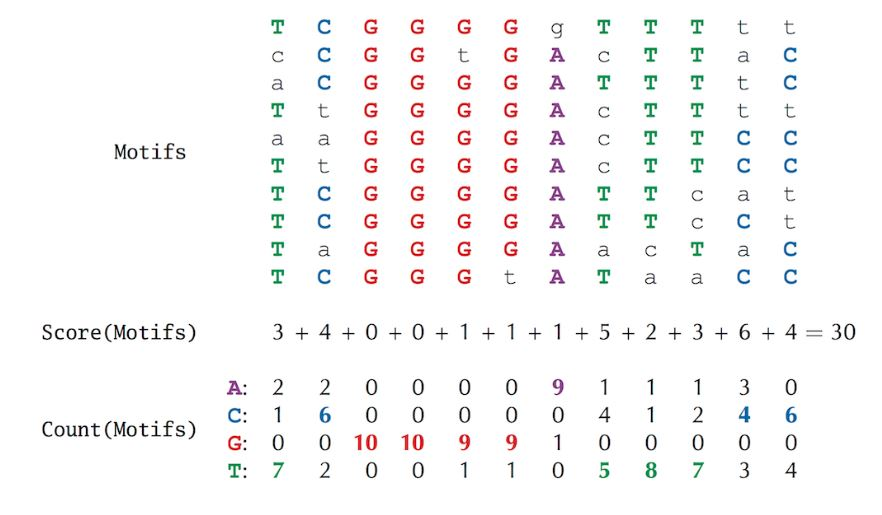

For many biological motifs, certain positions feature two nucleotides with roughly the same ability to bind to a transcription factor. For example, the sixteen nucleotide-long CSRE transcription factor binding site in the yeast S. cerevisiae consists of five strongly conserved positions in addition to eleven weakly conserved positions, each of which features two nucleotides with similar frequencies 

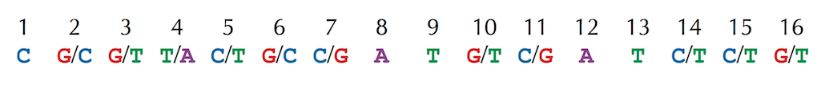

**Figure:** The CSRE transcription factor binding site in S. cerevisiae is 16 nucleotides long, but only five of these positions (1, 8, 9, 12, 13) are strongly conserved. The remaining 11 positions can take one of two different nucleotides.

Following this example, a more appropriate representation of the consensus string "TCGGGGATTTCC" for the NF-κB binding sites should include viable alternatives to the most popular nucleotides in each column (figure below). In this sense, the last column (6 C, 4 T) in the motif matrix from the figure in the first step is “more conserved” than the second column (6 C, 2 A, 2 T) and should receive a lower score. (Note that the corresponding position in the motif logo in the figure in the first step is taller as well.)

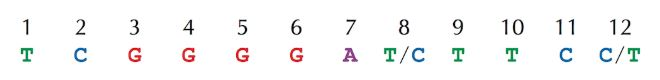

**Figure:** Taking nucleotides in each column of the NF-κB binding site motif matrix from the figure on the first step with frequency at least 0.4 yields a representation of the NF-κB binding sites with ten strongly conserved positions and two weakly conserved positions (8 and 12).



**Motif Scoring Using Entropy**

**Profile Matrix**

A profile matrix shows the probability of each nucleotide (A, C, G, T) at each position in a set of aligned DNA motifs.  
Each column is a **probability distribution** where the values sum to 1.

Example column:
- A = 0.2  
- C = 0.6  
- G = 0.0  
- T = 0.2

This means C appears most often at this position.



**Entropy Formula**

We calculate **entropy** to measure the uncertainty of each column.

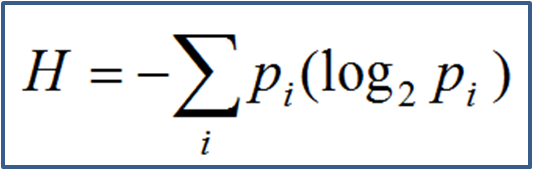





**Examples**

| Column Probabilities             | Entropy (H) |
|----------------------------------|-------------|
| (0.2, 0.6, 0.0, 0.2)             | ≈ 1.371     |
| (0.0, 0.6, 0.0, 0.4)             | ≈ 0.971     |
| (0.0, 0.0, 0.9, 0.1)             | ≈ 0.467     |

Lower entropy means the column is **more conserved**, which makes a **better motif**.







<span style="background-color: orange; color: black;">**What are the maximum and minimum possible values for the entropy of a probability distribution containing four values?**</span>


The entropy for the given probability distribution X = {0.25,0.25,0.25,0.25} is 2.
The entropy for the given probability distribution X = {1,0,0,0} is 0. This means there is no uncertainty associated with this probability distribution because the outcome is certain (with a probability of 1, the first event always occurs).

**What is being said?**

You're working with motif matrices (collections of DNA patterns), and trying to score them to find the best one.

Now they’re saying:

Instead of just counting matches like we used to (with Score(Motifs)), we can use entropy  a smarter method based on uncertainty.

**What does entropy tell us?**

Think of entropy like how random or uncertain a column of DNA letters is:

- A column where all sequences have the same letter, like all G's → No uncertainty → Entropy = 0.

- A column where letters A, C, G, T appear equally → Maximum uncertainty → Entropy = 2.

**Why use entropy?**

- Low entropy = more conserved = better motif

- So, the best motif matrix has the smallest total entropy.

Another application of entropy is the motif logo, a diagram for visualizing motif conservation that consists of a stack of letters at each position (see the bottom of the NF-κB figure, reproduced below). The relative sizes of letters indicate their frequency in the column. The total height of the letters in each column is based on the information content of the column, which is defined as 2 - H(p1,...,pN). **The lower the entropy, the higher the information content, meaning that tall columns in the motif logo are highly conserved.**

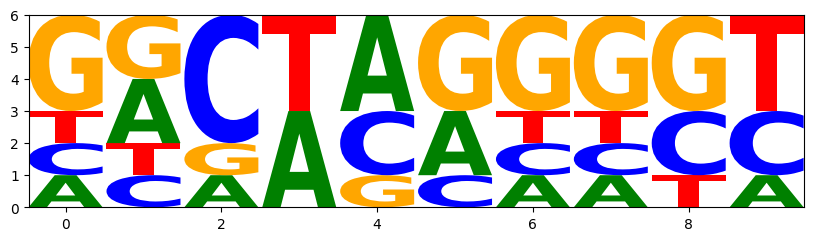

In [38]:
count = Count(Motifs)
df = pd.DataFrame(count)
logomaker.Logo(df)